## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [13]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

### 之前做過的處理

In [16]:
# 設定 data_path
dir_data = '/Users/06006706/Desktop/GitHub/ML100-Days/Part01/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

In [17]:
app_train["equal_width_DAYS_REGISTRATION"] = app_train["DAYS_REGISTRATION"]/-360

In [18]:
app_train["equal_width_DAYS_REGISTRATION"] = pd.cut(app_train["equal_width_DAYS_REGISTRATION"],10)

In [19]:
app_train["equal_width_DAYS_REGISTRATION"].value_counts()

(-0.0685, 6.853]    90067
(6.853, 13.707]     78873
(13.707, 20.56]     60122
(20.56, 27.413]     46717
(27.413, 34.267]    22215
(34.267, 41.12]      8064
(41.12, 47.973]      1288
(47.973, 54.827]      133
(54.827, 61.68]        24
(61.68, 68.533]         8
Name: equal_width_DAYS_REGISTRATION, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


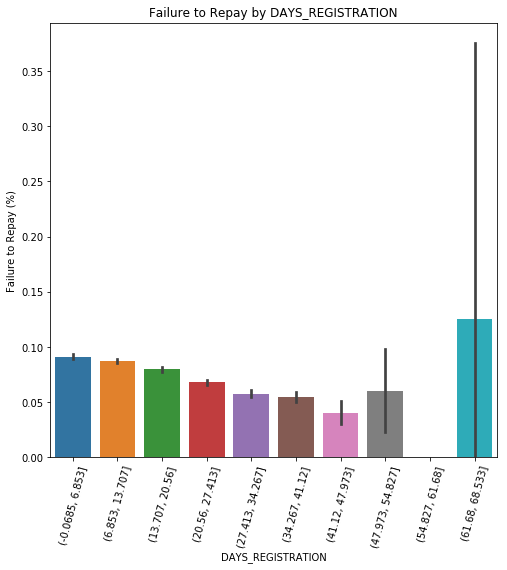

In [20]:
plt.figure(figsize = (8, 8))
px = app_train["equal_width_DAYS_REGISTRATION"]
py = app_train['TARGET']
sns.barplot(px, py)
plt.xticks(rotation = 75); plt.xlabel('DAYS_REGISTRATION'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by DAYS_REGISTRATION');

In [21]:
app_train['qcut_AMT_CREDIT'] = pd.qcut(app_train['AMT_CREDIT'], 10)

In [22]:
app_train['qcut_AMT_CREDIT'].value_counts()

(604152.0, 755190.0]      34066
(44999.999, 180000.0]     33204
(180000.0, 254700.0]      31721
(432000.0, 513531.0]      30826
(513531.0, 604152.0]      30726
(306306.0, 432000.0]      30707
(1133748.0, 4050000.0]    30593
(755190.0, 900000.0]      29958
(900000.0, 1133748.0]     28319
(254700.0, 306306.0]      27391
Name: qcut_AMT_CREDIT, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


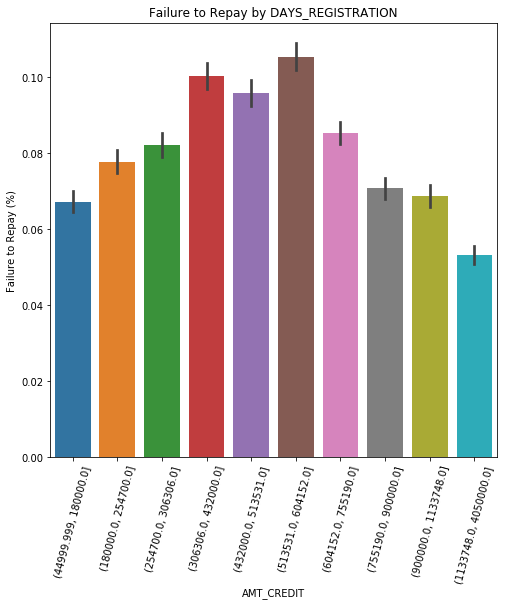

In [23]:
plt.figure(figsize = (8, 8))
px = app_train["qcut_AMT_CREDIT"]
py = app_train['TARGET']
sns.barplot(px, py)
plt.xticks(rotation = 75); plt.xlabel('AMT_CREDIT'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by DAYS_REGISTRATION');